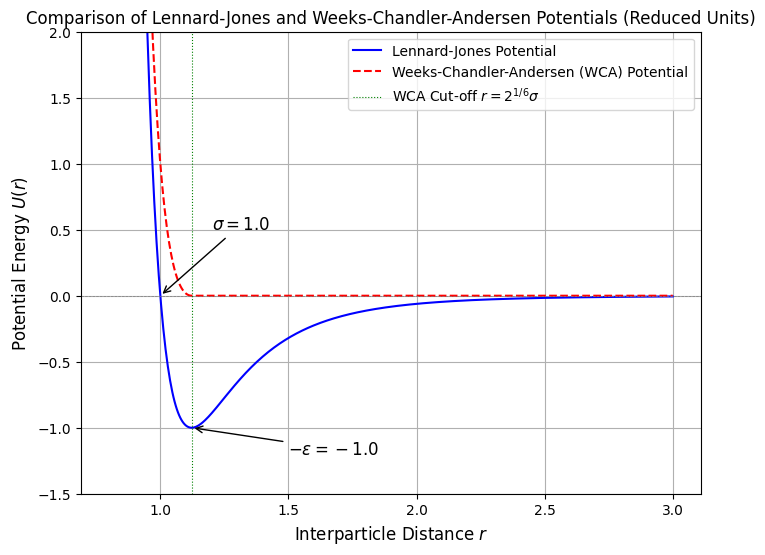

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the potentials in reduced units
epsilon = 1.0  # Depth of the potential well, in reduced units
sigma = 1.0    # Distance at which the potential is zero, in reduced units

# Define Lennard-Jones potential
def lennard_jones(r, epsilon, sigma):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Define Weeks-Chandler-Andersen (WCA) potential
def wca_potential(r, epsilon, sigma):
    # Only compute WCA for r <= 2^(1/6) * sigma, otherwise U = 0
    r_cutoff = 2**(1/6) * sigma
    U_wca = np.where(r <= r_cutoff, 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6) + epsilon, 0.0)
    return U_wca

# Generate a range of distances for plotting
r = np.linspace(0.8 * sigma, 3 * sigma, 500)

# Calculate potential values
U_lj = lennard_jones(r, epsilon, sigma)
U_wca = wca_potential(r, epsilon, sigma)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(r, U_lj, label="Lennard-Jones Potential", color="blue")
plt.plot(r, U_wca, label="Weeks-Chandler-Andersen (WCA) Potential", color="red", linestyle="--")
plt.axhline(0, color="grey", linestyle="--", linewidth=0.5)
plt.axvline(2**(1/6) * sigma, color="green", linestyle=":", linewidth=0.8, label=r"WCA Cut-off $r = 2^{1/6} \sigma$")

# Corrected annotations for epsilon and sigma
# Annotate epsilon at the depth of the potential well
r_min = 2**(1/6) * sigma  # This is where the WCA potential is truncated
plt.annotate(r'$-\epsilon = -{:.1f}$'.format(epsilon), xy=(r_min, -epsilon), 
             xytext=(1.5 * sigma, -1.2 * epsilon),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

# Annotate sigma at the zero-crossing of the LJ potential
plt.annotate(r'$\sigma = {:.1f}$'.format(sigma), xy=(sigma, 0), 
             xytext=(1.2 * sigma, 0.5 * epsilon),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

# Labels and legend
plt.xlabel(r"Interparticle Distance $r$", fontsize=12)
plt.ylabel(r"Potential Energy $U(r)$", fontsize=12)
plt.title("Comparison of Lennard-Jones and Weeks-Chandler-Andersen Potentials (Reduced Units)")
plt.legend()
plt.ylim(-1.5 * epsilon, 2 * epsilon)
plt.grid(True)
plt.show()
